# <span style="color:red">**SPRINT 11:**</span> <span style="color:YELLOW">**Visualización de datos con PYTHON y Power BI**</span>

# **NIVEL 1**

**1.1** Conecta Python con MySQL Workbench y carga los datos de tu base de datos del sprint 4 para usarlas en todos los ejercicios.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
import seaborn as sns
import plotly.express as px

In [3]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root1234",
    database="transactions_s4"
)

df_transactions = pd.read_sql("SELECT * FROM `transaction`", conn)
df_users = pd.read_sql("SELECT * FROM users", conn)
df_cards = pd.read_sql("SELECT * FROM credit_cards", conn)
df_companies = pd.read_sql("SELECT * FROM companies", conn)
df_transaction_product = pd.read_sql("SELECT * FROM transaction_product", conn)
df_products = pd.read_sql("SELECT * FROM products", conn)
df_targetes_actives = pd.read_sql("SELECT * FROM targetes_actives", conn)

conn.close()

C:\Users\vanes\AppData\Local\Temp\ipykernel_25264\3767512378.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql("SELECT * FROM `transaction`", conn)
C:\Users\vanes\AppData\Local\Temp\ipykernel_25264\3767512378.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_users = pd.read_sql("SELECT * FROM users", conn)
C:\Users\vanes\AppData\Local\Temp\ipykernel_25264\3767512378.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cards = pd.read_sql("SELECT * FROM credit_cards", conn)
C:\Users\va

1.2. Para cada ítem, crea una visualización adecuada según las variables especificadas. Interpreta los resultados según tus datos.
Una variable numérica.  
Dos variables numéricas.  
Una variable categórica.  
Una variable categórica y una numérica.  
Dos variables categóricas.  
Tres variables combinadas.  
Crea un Pairplot.

## <span style="color:orange"> 1 var. CATEGÓRICA </span>

##### Ej 1: BAR PLOT HORIZONTAL

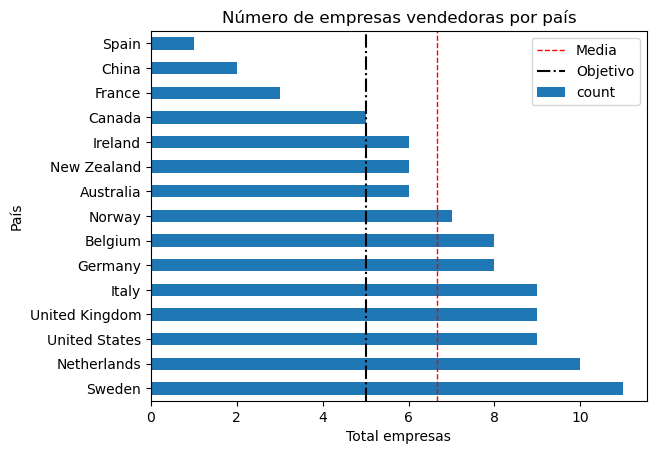

In [4]:
ax = df_companies["country"].value_counts().plot.barh()          
plt.title("Número de empresas vendedoras por país")
plt.ylabel("País")
plt.xlabel("Total empresas")
media = df_companies["country"].value_counts().mean()
ax.axvline(x=media, color='r', linestyle='--', linewidth=1,label="Media")
ax.axvline(x=5, color='black', linestyle="-.", label="Objetivo")
ax.legend()

plt.show()

Se observa:  
- El 80% de los países cumplen el objetivo de 5 empresas vendedoras en ese mercado.
- 3 países todavía por debajo del objetivo (España, China, Francia)
- Éstos 3 y 4 siguientes están por debajo de la media (Canada, Irlanda, Nueva Zelanda, Australia). 
- **Hay potencial de expansión en los 7 países que todavía se quedan por debajo de la media, en especial los 3 que no cumplen el objetivo, pero hay que estudiar más a fondo con otros parámetros del mercado, competencia, etc.**.

##### Ej 2: BAR PLOT EN %

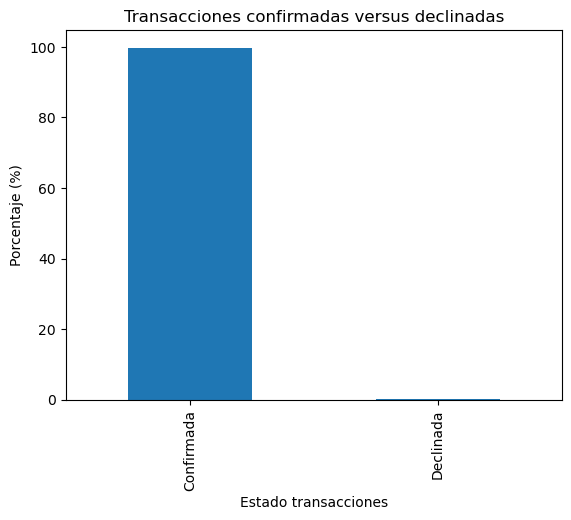

In [5]:
df_transactions["declined"].map({0: "Confirmada", 1: "Declinada"}).value_counts(normalize=True).mul(100).plot.bar()          
plt.title("Transacciones confirmadas versus declinadas")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Estado transacciones")
plt.show()

##### Ej 3: BAR PLOT

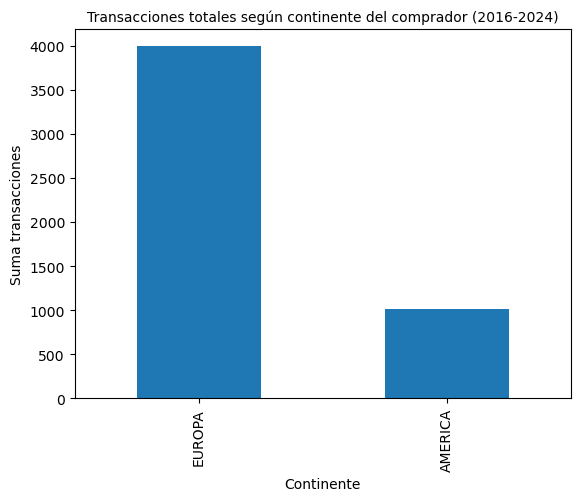

In [6]:
df_users["continent"].value_counts().plot.bar()
plt.title("Transacciones totales según continente del comprador (2016-2024)", fontsize= 10)
plt.ylabel("Suma transacciones")
plt.xlabel("Continente")
plt.show()

# VERSIÓ PERCENTUAL:
#     df_users["continent"].value_counts(normalize=True).mul(100).plot.bar()

VERSIÓ PERCENTUAL BAR PLOT ANTERIOR: df_users["continent"].value_counts(normalize=True).mul(100).plot.bar()

##### Ej 4: PIE PLOT

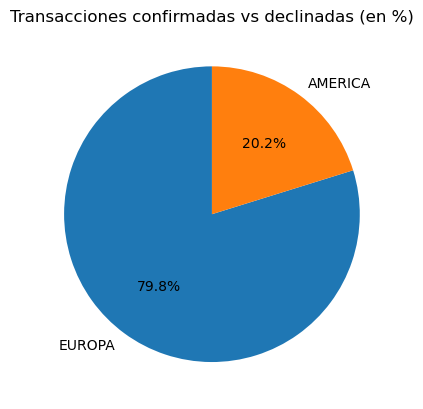

In [7]:
df_users["continent"].value_counts(normalize=True).mul(100).plot.pie(startangle=90, autopct='%1.1f%%')
plt.title("Transacciones confirmadas vs declinadas (en %)")
plt.ylabel("")  # "" x treure etiqueta lateral
plt.show()


## <span style="color:orange"> 1 var. NUMÉRICA </span>

##### Ej 5: Histograma

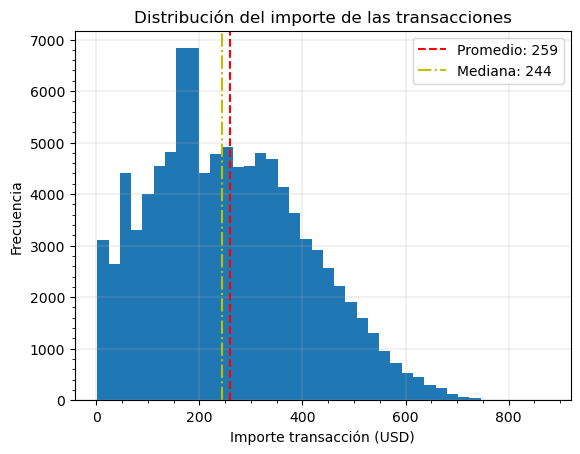

In [8]:
# MATPLOTLIB
plt.hist(df_transactions["amount"], bins=40)
media_ej5 = df_transactions["amount"].mean()
mediana_ej5 = df_transactions["amount"].median()

plt.axvline(media_ej5, color='r', linestyle="--", label=f"Promedio: {media_ej5:.0f}")
plt.axvline(mediana_ej5, color='y', linestyle="-.", label=f"Mediana: {mediana_ej5:.0f}")

plt.title("Distribución del importe de las transacciones")
plt.xlabel("Importe transacción (USD)")
plt.ylabel("Frecuencia")
plt.minorticks_on()
plt.grid(linewidth=0.25)
plt.legend(loc="best")
plt.show()


Se observa que:  
-   la distribución principal del importe de las transacciones se encuentra entre 100 y 350 USD, con un pico (moda) entre 150-200 USD.  
-   El número de transacciones disminuye de forma gradual en pedidos de importe superior a 350 USD.  
-   Hay una asimetría con cola a la derecha (pedidos de importes superiores, menos frecuentes)

Interesaría cruzar esta información con la cantidad de productos por transacción y el precio de los productos incluidos; también interesaría saber si las transacciones más elevadas son debidas a muchas unidades o a productos más caros.

## <span style="color:orange"> 2 var. NUMÉRICA  </span>

##### Ej 6: Box plot

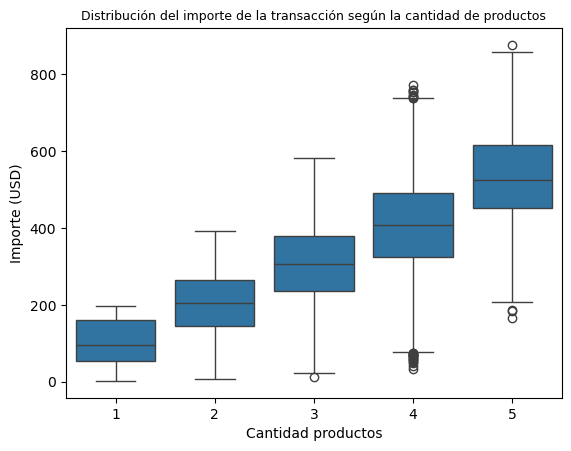

In [9]:
df_unidades = (df_transaction_product.groupby("transaction_id")["unitats"].sum()) # df_unido_prod_transuma productos por venta
df_grafica_unidades_amount = df_transactions.merge(df_unidades, left_on="id", right_on="transaction_id")

sns.boxplot(x="unitats", y="amount", data=df_grafica_unidades_amount)
plt.title("Distribución del importe de la transacción según la cantidad de productos", fontsize=9)
plt.ylabel("Importe (USD)")
plt.xlabel("Cantidad productos")
plt.show()

Se observa:  
- relación positiva: a más unidades incluidas en la transacción, mayor importe total del tiquet (transacción). Así el volumen de unidades explica en parte que aumente el tiquet.  
- La variación del importe total de la venta es más amplio cuando hay 3-5 unidades incluidas.  
- En transacciones con 4 unidades, se concentran bastantes outliers, lo que indica transacciones con coste total anormalmente alta o baja. Deberíamos revisar si los datos contienen algún error o alguna compra especial.

##### Ej 7: Scatter plot (a)

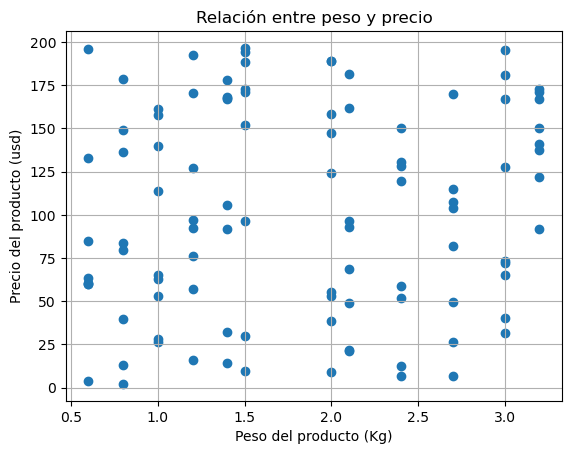

In [10]:
plt.scatter(df_products["weight"], df_products["price"])
plt.xlabel("Peso del producto (Kg)")
plt.ylabel("Precio del producto (usd)")
plt.title("Relación entre peso y precio")
plt.grid()
plt.show()


- Dada la dispersión generalizada, no hay correlación entre el peso y el precio del producto.
- En caso que la correlación hubiera sido positiva, podría haber indicado oor ej. que el precio del kg de materia prima es significativo y/o que a más material, más coste de procesado/producción (que se repercute en el precio final).

##### Ej 8: Scatter plot (b)

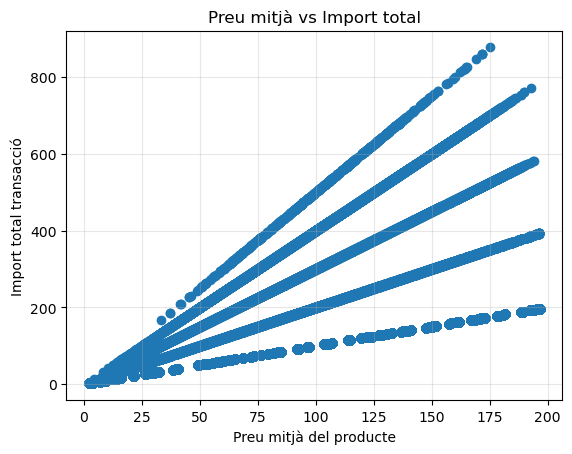

In [11]:
df_price_mean = (df_transaction_product.groupby("transaction_id")["price"].mean().reset_index())
df_plot = df_transactions.merge(df_price_mean,left_on="id",right_on="transaction_id")

plt.scatter(df_plot["price"], df_plot["amount"])
plt.xlabel("Preu mitjà del producte")
plt.ylabel("Import total transacció")
plt.title("Preu mitjà vs Import total")
plt.grid(alpha=0.3)
plt.show()


Se observa:
- Correlación fuerte entre el precio medio de los productos incluidos y el importe total de la transacción; la presencia de productos caros en el pedido aumentará significativamente el valor final del tiquet.

## <span style="color:orange">  1 var. NUM + 1CAT </span>

##### Ej 9: Bar plot (a)

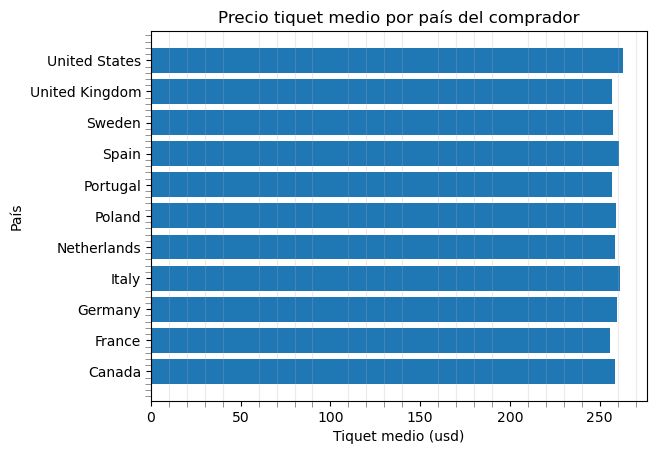

In [12]:
df_transactions_users = df_transactions.merge(df_users, left_on="user_id", right_on="id")
df_media_por_pais = df_transactions_users.groupby("country")["amount"].mean()
plt.barh(df_media_por_pais.index, df_media_por_pais.values)
plt.title("Precio tiquet medio por país del comprador")
plt.ylabel("País")
plt.xlabel("Tiquet medio (usd)")
plt.tick_params(which='minor', length=4, color='grey')  # Estil dels minor ticks
plt.grid(which='minor', axis='x', alpha=0.25)
plt.minorticks_on()

plt.show()


Se observa que:
- Homogeneidad relativa en el tiquet medio de los países (se concentra principalmente entre 250-260$, con algun país con tiquet medio 260-270$).
- No será necesario ningún estudio complementario de marketing para aumentar el tiquet medio de países con retraso.

Podría ampliarse el análisis con:
- filtro por transacciones con éxito (declined=0)
- recuento de usuarios activos por país versus total de usuarios por país (barras apiladas) para estudiar un incentivo donde hay más usuarios registrados pero inactivos o qué países tienen pocos usuarios totales y necesitan más campañas para consolidarse y compensar tener el mercado abierto allí.

##### Ej. 10 Bar plot (b)

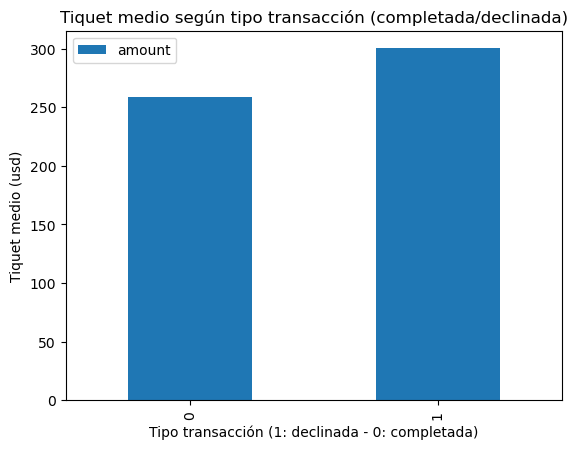

In [13]:
df_media = df_transactions_users.groupby("declined")[["amount"]].mean().plot.bar()
plt.title("Tiquet medio según tipo transacción (completada/declinada)")
plt.ylabel("Tiquet medio (usd)")
plt.xlabel("Tipo transacción (1: declinada - 0: completada)")
plt.show()

## <span style="color:orange"> 2 var. CATEGÓRICAS </span>

##### Ej 11: Bar plot (a)

<span style="color:red">Nota:</span> he usado groupby() .pivot() + df.plot.bar() y no crosstab() porque aunque crosstab() ahorraba paso intermedio de groupby, hace más complejo el filtrado de almacenes por top/low y años.

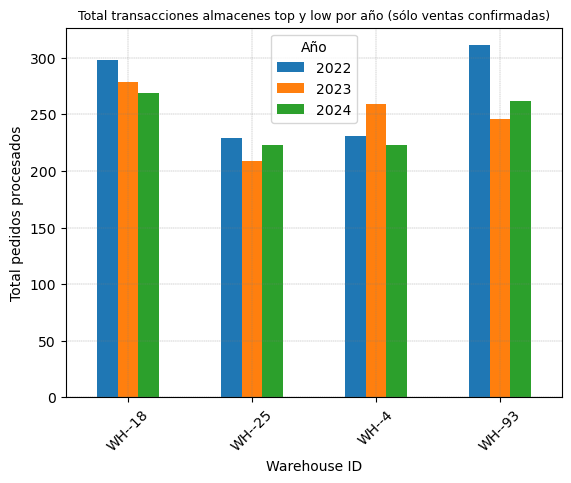

In [14]:
df_unido_prod_tran = df_transactions.merge(df_transaction_product, left_on="id", right_on="transaction_id")
df_unido_prod_tran = df_unido_prod_tran.merge(df_products, left_on="product_id", right_on="id")

df_unido_prod_tran= df_unido_prod_tran[df_unido_prod_tran["declined"] == 0]

df_unido_prod_tran["year"] = pd.to_datetime(df_unido_prod_tran["timestamp"]).dt.year
df_unido_prod_tran= df_unido_prod_tran[df_unido_prod_tran["year"].isin([2022, 2023, 2024])]

df_agrupat = df_unido_prod_tran.groupby(["warehouse_id", "year"])["transaction_id"].count().reset_index(name="total_transactions")

totals = df_agrupat.groupby("warehouse_id")["total_transactions"].sum()
warehouses_2top_2low = list(totals.nlargest(2).index) + list(totals.nsmallest(2).index)
df_agrupat = df_agrupat[df_agrupat["warehouse_id"].isin(warehouses_2top_2low)]

df_pivot = df_agrupat.pivot(index="warehouse_id", columns="year", values="total_transactions")
df_pivot.plot.bar()
plt.title("Total transacciones almacenes top y low por año (sólo ventas confirmadas)", fontsize=9)
plt.xlabel("Warehouse ID")
plt.ylabel("Total pedidos procesados")
plt.legend(title="Año")
plt.grid(linewidth=0.25, color= "grey", linestyle="--")
plt.xticks(rotation=45)

plt.show()

- El gráfico muestra la evolución de las ventas procesadas por almacén y año. Del histórico 2022-2024 se ha tomado los 2 almacenes top y los 2 almacenes con menor total de transacciones procesadas. 

- Con esta diferencia se puede observar la magnitud de transacciones procesadas entre el qué más y el qué menos, así como la evolución histórica de estos almacenes en los últimos 3 años de datos.

- Se observa por ejemplo que el almacén WH--25 el 2023 fue el que tuvo menos pedidos procesados, frente al WH--93 el 2022 que gestionó aproximadamente 100 más, un 30% de diferencia entre uno y otro.

<span style="color:red"> **Extra:** </span>Interesaría cruzar el total de ventas despachadas por almacén en los últimos años con el total de facturación que implican las mismas. Así se podría conocer si se alinea el esfuerzo logístico de procesado con el beneficio obtenido.

## <span style="color:orange"> 3-4 variables </span>

##### Ej. 12: Scatter 3 variables

In [15]:
df_3_variab = df_transactions.merge(df_companies, left_on="business_id", right_on="company_id")

df_3_variab = df_3_variab[df_3_variab["declined"] == 0]

df_company_metric = df_3_variab.groupby(["business_id", "company_name", "country"]).agg(
    total_transactions=("id", "count"),
    amount_mitjana=("amount", "mean"),
    amount_total=("amount", "sum")
).reset_index()

fig = px.scatter(
    df_company_metric,
    x="total_transactions",
    y="amount_mitjana",
    color="amount_total",
    hover_name="company_name",
    hover_data={
        "amount_total": True,
        "amount_mitjana": True,
        "country": True
    },
    title="Segmentación de empresas per volumen y facturación acumulada (2016-2024)",
    labels={
        "business_id": "Id empresa",
        "amount_mitjana": "Tiquet medio (usd)",
        "total_transactions": "Total transacciones (2016-2024)",
        "amount_total": "Facturación acumulada",
        "country": "País"
    }
)

fig.show()

En este gráfico se identifican las empresas clave por volumen, tiquet medio y facturación total a partir de las transacciones confirmadas entre el 2016-2024.

Se observan dos grupos :
- El primero (puntos azules) se encuentra entre 250-500 transacciones aproximadamente y un tiquet medio más disperso pero principalmente concentrado entre 250-270 usd de tiquet medio, con alguno outliers por debajo y por encima. La facturación acumulada es entre 100k-125k USD.
- El segundo (puntos rojizos) contiene entre 1400-1600 transacciones acumuladas (el doble que el primer grupo); un tiquet medio por transacción un poco más homogéneo que el primer grupo, con 250-265usd por tiquet aproximadamente; y una facturación acumulada entre 350K-500k USD.
- Aparece un outlier con diferencias muy significativas tanto en transacciones acumuladas (2400) como en el tiquet medio (285usd). Es el caso anteriormente estudiado de Alemania que tuvo un impacto temporal y el cuál sería interesante contactar para potenciar su recuperación.

A partir de las siguientes observaciones se podría profundizar con un filtrado temporal de los últimos 2 años, para tener en cuenta la valía de cada empresa según las transacciones reales más recientes, y también un filtrado por países, para poder adaptar las estrategias de marketing al comportamiento de cada uno.

##### Ej. 13: Scatter 4 variables

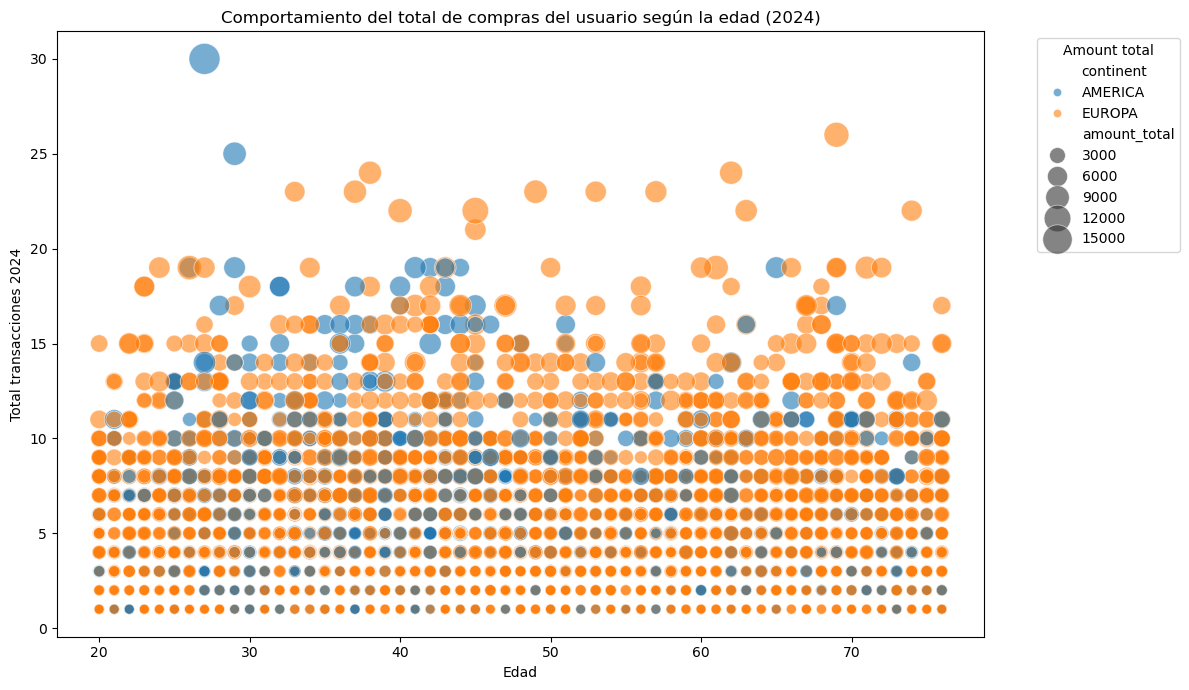

In [17]:
df_edad_trans_cont = df_transactions.merge(df_users, left_on="user_id", right_on="id")
df_edad_trans_cont = df_edad_trans_cont.merge(df_transaction_product, left_on="id_x", right_on="transaction_id")
df_edad_trans_cont = df_edad_trans_cont.merge(df_products, left_on="product_id", right_on="id")

df_edad_trans_cont["year"] = pd.to_datetime(df_edad_trans_cont["timestamp"]).dt.year
df_edad_trans_cont = df_edad_trans_cont[df_edad_trans_cont["year"] == 2024]
df_edad_trans_cont = df_edad_trans_cont[df_edad_trans_cont["declined"] == 0]

# 3. Calcular edat
df_edad_trans_cont["edat"] = pd.Timestamp.now().year - pd.to_datetime(df_edad_trans_cont["birth_date"]).dt.year

# 4. Agregar per usuari
df_usuari = df_edad_trans_cont.groupby(["user_id", "continent", "edat"]).agg(
    total_transactions=("transaction_id", "count"),
    amount_mitjana=("amount", "mean"),
    amount_total=("amount", "sum")
).reset_index()

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_usuari,
    x="edat",
    y="total_transactions",
    hue="continent",
    size="amount_total",
    sizes=(50, 500),
    alpha=0.6,
    color="steelblue"
)

plt.title("Comportamiento del total de compras del usuario según la edad (2024)")
plt.xlabel("Edad")
plt.ylabel("Total transacciones 2024")
sns.move_legend(plt.gca(), title="Amount total", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Se observa que:
- De forma general, no hay un patrón visible de correlación entre el número de transacciones / total facturación y la edad.
- Hay más usuarios de Europa (naranja) que America (azul). 
- En America, los compradores puntuales con más transacciones y volumen fueron jóvenes de menos de 30 años. En Europa el rango de edad para los compradores con más transacciones (alrededor de 25) se dispersaba en todas las décadas. 

Habría que mirar otras variables para buscar una correlación con el patrón de compra de estos casos de compradores más VIP.

## <span style="color:orange"> PAIRPLOT </span>

##### Ej. 13: Pairplot

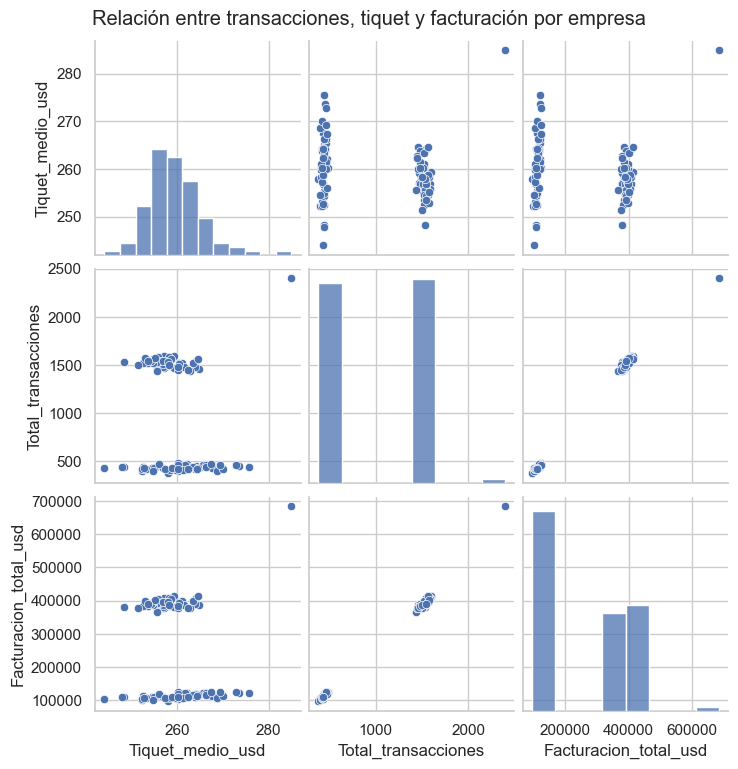

In [47]:
df_pairplot = df_company_metric.rename(columns={
    "amount_mitjana": "Tiquet_medio_usd",
    "total_transactions": "Total_transacciones",
    "amount_total": "Facturacion_total_usd"
})

sns.pairplot(df_pairplot[
    ["Tiquet_medio_usd",
     "Total_transacciones",
     "Facturacion_total_usd"]])
plt.suptitle("Relación entre transacciones, tiquet y facturación por empresa", y=1.02)
plt.show()




1) TIQUET MEDIO

**Descripción** La distribución del tiquet medio por empresa vendedora está concentrada, es relativamente homogénea. No es del todo simétrica pero casi, con una ligera cola a la derecha que termina en un outlier.  
 **Interpretación:** El tiquet medio está concentrado, por lo que no hay diferencias grandes entre las empresas. No es la variable que explique las diferencias en la facturación.
 
2) TOTAL TRANSACCIONES
**Descripción** La distribución del total de transacciones por empresa vendedora está dividida en 2 grupos/clusters + 1 outlier.
  **Interpretación:** grupos de empresas con nivel de ventas distinta
3) FACTURACIÓN TOTAL  
- La distribución del total de facturación por empresa vendedora también se divide en 2 grupos/clusters + 1 outlier

- RELACIÓN POR PARES DE VARIABLE

4) Total de transacciones vs facturación total: **relación lineal positiva**, lo que explica que el volumen de transacciones influye fuertemente en la facturación total.

5) Tiquet medio vs Total transacciones
- A similar número de transacciones puede haber mayor o menoy tiquet medio. Cierto que el rango del tiquet medio es más concentrado en las empresas con más transacciones, pero en ambos casos está repartido. El tiquet medio no se explica por la cantidad de transacciones.

6) Tiquet Medio vs facturación total: empreses con más actividad no tienen tickets más elevados que otras con menos transacciones.

7) VALOR ATÍPICO: Empresa con gran volumen de transacciones y gran facturación acumulada, identificado por el anterior gráfico como la empresa AC FERMENTUM (caso Alemania)

### ------------------

# **NIVEL 2**

### 2.1. Correlación
Representa la correlación de algunas variables e interpreta los resultados según tus datos.

#### 2 variables: SCATTER + REGRESSION LINE

##### con Matplotlib

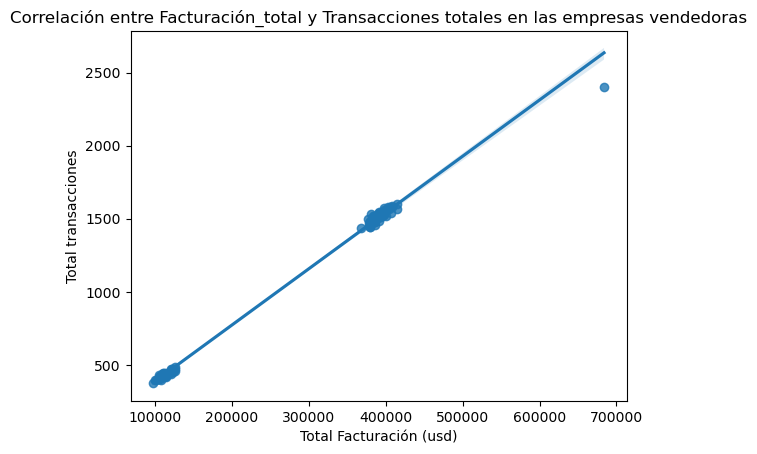

In [24]:
# Facturació total vs total transaccions

plt.figure()
sns.regplot(x='amount_total', y='total_transactions', data=df_company_metric)

plt.title('Correlación entre Facturación_total y Transacciones totales en las empresas vendedoras')
plt.xlabel("Total Facturación (usd)")
plt.ylabel("Total transacciones")
plt.show()

En el diagrama de dispersión con recta de regresión se observa:
- Una correlación lineal positiva entre la facturación total y el número total de transacciones.   
- Los puntos se alinean alrededor de la recta de regresión y existe una pendiente muy marcada. Esto significa que la correlación es muy fuerte entre las 2 variables.  
- El valor atípico (anteriormente identificado como empresa AC Fermentum), aunque no esté encima de la recta está muy cerca de ella y sigue la tendencia general de relación lineal observada.

Dado que la facturación total se calcula a partir del tiquet medio multiplicado por el total de transacciones, se confirma la correlación esperada, que **puede tenerse en cuenta, por ejemplo, para establecer el objetivo de mejora en cuanto a la facturación total anual**.

##### con Seaborn

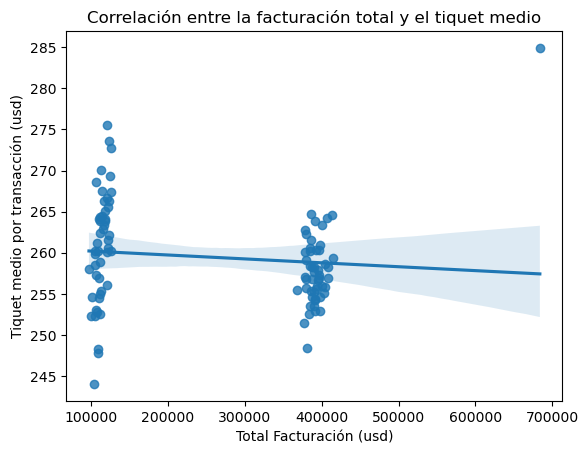

In [31]:
plt.figure()
sns.regplot(x='amount_total', y='amount_mitjana', data=df_company_metric)

plt.title('Correlación entre la facturación total y el tiquet medio')
plt.xlabel("Total Facturación (usd)")
plt.ylabel("Tiquet medio por transacción (usd)")
plt.show()


- En este gráfico de dispersión con recta de regresión no se observa una relación lineal clara entre la facturación total y el tiquet medio por transacción.
- La pendiente es ligeramente negativa pero practicamente plana, así que el coeficiente de correlación r debe ser cercano a 0 (ver matriz de correlación abajo). 
- Los puntos NO se alinean alrededor de la recta de regresión. Sí que aparecen agrupados en 2 clusters (grupo alrededor de 100.000usd y de 400.000usd como facturación total por empresa). En cambio, el tiquet medio por transacción se mantiene en un números parecidos en ambos grupos, sin ser superior o inferior si se aumenta o disminuye la facturación.

Por lo tanto, a efectos prácticos conocer el tiquet medio de una empresa no permitirá predecir el desarrollo de facturación global de las empresas.



##### con Plotly

In [59]:
fig = px.scatter(
    df_company_metric, 
    x="total_transactions", 
    y="amount_mitjana", 
    trendline="ols",
    title="Correlación: Total transacciones vs Tiquet medio", 
    labels={
        "total_transactions": "Total transacciones",
        "amount_mitjana": "Tiquet medio (USD)"}
)

fig.show()

- En este gráfico de dispersión con recta de regresión no se observa una relación lineal clara entre el total de transacciones y el tiquet medio por transacción.
- La pendiente es ligeramente negativa pero practicamente plana, así que el coeficiente de correlación r debe ser cercano a 0 (ver matriz de correlación abajo). 
- Los puntos NO se alinean alrededor de la recta de regresión. Sí que aparecen agrupados en 2 clusters (grupo alrededor de 400 compras y grupos de 1500 aprox.). En cambio, el tiquet medio por transacción se mantiene en un números parecidos en ambos grupos, sin ser superior o inferior si se aumenta o disminuye el número de transacciones.

Por lo tanto, a efectos prácticos conocer el tiquet medio de una empresa no permitirá predecir el total de transacciones que realizarían las empresas.

#### 3+ variab: HEATMAP

In [ ]:
# Crear matriz de correlación
df_correlacio = df_pairplot[["Tiquet_medio_usd", "Total_transacciones", "Facturacion_total_usd"]].corr()
df_correlacio


,Tiquet_medio_usd,Total_transacciones,Facturacion_total_usd
Tiquet_medio_usd,1.000000,-0.155215,-0.112265
Total_transacciones,-0.155215,1.000000,0.998555
Facturacion_total_usd,-0.112265,0.998555,1.000000


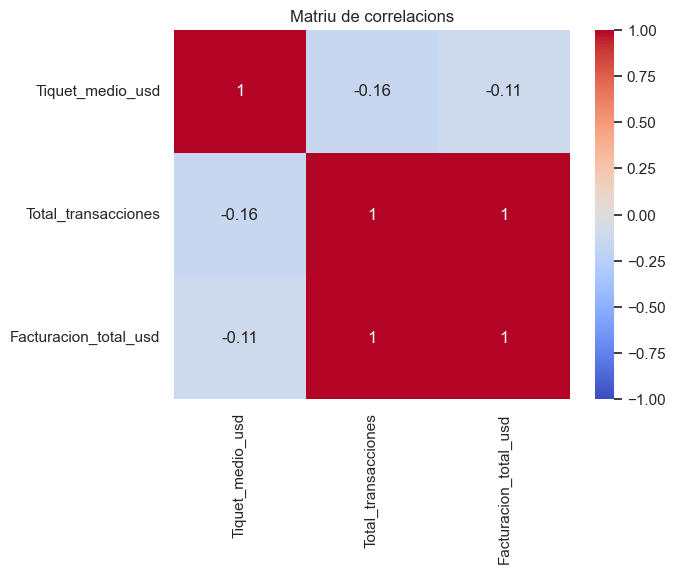

In [58]:
# Visualización en forma de Heatmap
sns.heatmap(df_correlacio, 
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1)
plt.title('Matriu de correlacions')
plt.show()


Los números de la matriz de correlación confirman lo observado en las rectas de regresión anteriores:
- Correlación lineal perfecta (1) entre Facturación total y el total de transacciones.
- Correlación linea débil (no significativa) entre tiquet medio-total transacciones y tiquet medio-facturación total.

Por lo tanto, el tiquet medio es independiente de la cantidad de compras realizadas a las empresas por parte de los usuarios.
Hará falta incluir en el estudio otras variables relacionadas con los usuarios/clientes, los productos, etc.

### 2.2. Jointplot
2. Implementa un Jointplot para explorar la relación entre 2 variables e interpreta los resultados según tus datos:

Un jointplot es un gráfico que muestra:  
- **Gráfico central**: Relación entre 2 variables (scatterplot por defecto)
- **Márgenes superiores/inferiores**: Distribuciones de cada variable

Útil para ver la correlación y la distribución de cada variable en el mismo gráfico.

**Estructura**  
    [Histograma X]         Distribució de X  
    [Scatterplot central]  Relació X vs Y  
    [Histograma Y]         Distribució de Y


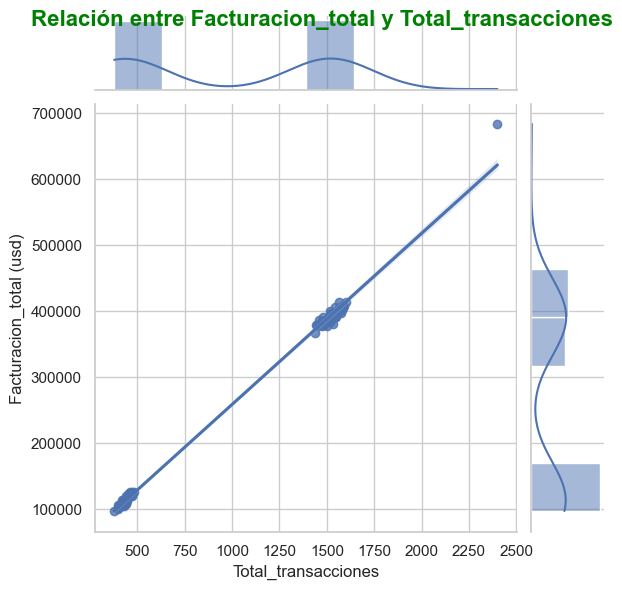

In [67]:
graf_join =  sns.jointplot(x="Total_transacciones", y="Facturacion_total_usd", data=df_pairplot, kind="reg")

graf_join.set_axis_labels("Total_transacciones", "Facturacion_total (usd)", fontsize=12)
plt.suptitle("Relación entre Facturacion_total y Total_transacciones", fontsize=16, color='green', fontweight='bold', ha='center')

plt.show()

Tal y como se ha observado para estas variables en la matriz de correlación, se observa una correlación positiva muy fuerte entre transacciones y facturación (casi perfecta excepto por el outlier).  
Se observan 2 grupos de empresas (clusters) claramente diferenciados por volumen (aprox. 400 y 1500 transacciones).  
El outlier (aprox. 2400 transacciones, 680.000 USD) se desvía un poco de la tendencia general pero sin perder la tendencia de correlación positiva fuerte anterior.  

Este gráfico es muy útil para observar la correlación y la segmentación de grupos a la vez.

### ------------------

# **NIVEL 3** - Power BI

 Transfiere todas las visualizaciones del nivel 1 a Power BI usando scripts de Python. 
 Realizamos la preparación del código, que debe contener:
 - Dataframes en forma de dataset
 - Dataframes con índice único
 - Import necesarios en cada script   

 <span style="color:yellow"> El código para ejecutar los SCRIPTS de PYTHON en POWER BI es: </span>

 <span style="color:green"> Código de importación en celda Markdown para evitar ejecución al marcar RUNN ALL: </span>

    import pandas as pd  
    import matplotlib.pyplot as plt  
    import mysql.connector  


    conn = mysql.connector.connect(  
        host="localhost",  
        user="root",  
        password="root1234",  
        database="transactions_s4"  
    )  

    df_transactions = pd.read_sql("SELECT * FROM `transaction`", conn).reset_index(drop=True)  
    df_users = pd.read_sql("SELECT * FROM users", conn).reset_index(drop=True)  
    df_cards = pd.read_sql("SELECT * FROM credit_cards", conn).reset_index(drop=True)  
    df_companies = pd.read_sql("SELECT * FROM companies", conn).reset_index(drop=True)  
    df_transaction_product = pd.read_sql("SELECT * FROM transaction_product", conn).reset_index(drop=True)  
    df_products = pd.read_sql("SELECT * FROM products", conn).reset_index(drop=True)  
    df_targetes_actives = pd.read_sql("SELECT * FROM targetes_actives", conn).reset_index(drop=True)  

    conn.close()

### 1 categòrica

DATAFRAMES en forma de DATASET: Power BI passa les dades a l'script com a dataset.

**pythondf_transactions = dataset.copy()**
Canvia nom dataset a df_transactions per comoditat de no canviar el codi. S'ha d'afegir a cada script de cada visual, perquè cada visual de Power BI és independent i té el seu propi dataset amb les columnes que has arrossegat a aquell visual.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_companies = dataset.copy()
ax = df_companies["country"].value_counts().plot.barh()          
plt.title("Número de empresas vendedoras por país")
plt.ylabel("País")
plt.xlabel("Total empresas")
media = df_companies["country"].value_counts().mean()
ax.axvline(x=media, color='r', linestyle='--', linewidth=1,label="Media")
ax.axvline(x=5, color='black', linestyle="-.", label="Objetivo")
ax.legend()

plt.show()

NameError: name 'dataset' is not defined

### 1 var. numérica

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_transactions = dataset.copy()
plt.hist(df_transactions["amount"], bins=40)

media_ej5 = df_transactions["amount"].mean()
mediana_ej5 = df_transactions["amount"].median()

plt.axvline(media_ej5, color='r', linestyle="--", label=f"Promedio: {media_ej5:.0f}")
plt.axvline(mediana_ej5, color='y', linestyle="-.", label=f"Mediana: {mediana_ej5:.0f}")

plt.title("Distribución del importe de las transacciones")
plt.xlabel("Importe transacción (USD)")
plt.ylabel("Frecuencia")
plt.minorticks_on()
plt.grid(linewidth=0.25)
plt.legend(loc="best")
plt.show()

NameError: name 'dataset' is not defined

### 2 var. numérica

- A l'afegir tots els camps de diferents dataframes en l'apartat VALORS del visual, Power Bi ja fa el join/merge i ens hem de referir al dataset / dataframe com un de sol.  
- S'ha de crear una MESURA DAX que sumi "unitats" per id de transacció (Substitueix el codi "(df_transaction_product.groupby("transaction_id")["unitats"].sum())")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset.copy()
print(df.head())
sns.boxplot(
    x="Total_Unitats",
    y="amount",
    data=df
)

plt.title("Distribución del importe de la transacción según la cantidad de productos")
plt.xlabel("Cantidad productos")
plt.ylabel("Importe (USD)")
plt.show()

NameError: name 'dataset' is not defined

### 1 NUM +1 CAT

In [ ]:
import matplotlib.pyplot as plt

df_transactions_users = dataset.copy()
df_media_por_pais = df_transactions_users.groupby("country")["amount"].mean().plot.barh()
plt.title("Precio tiquet medio por país del comprador")
plt.ylabel("País")
plt.xlabel("Tiquet medio (usd)")
plt.tick_params(which='minor', length=4, color='grey')
plt.grid(which='minor', axis='x', alpha=0.25)
plt.minorticks_on()

plt.show()

NameError: name 'dataset' is not defined

### 2 CAT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_unido_prod_tran = dataset.copy()

df_unido_prod_tran= df_unido_prod_tran[df_unido_prod_tran["declined"] == 0]
df_unido_prod_tran["year"] = pd.to_datetime(df_unido_prod_tran["timestamp"]).dt.year
df_unido_prod_tran= df_unido_prod_tran[df_unido_prod_tran["year"].isin([2022, 2023, 2024])]

df_agrupat = df_unido_prod_tran.groupby(["warehouse_id", "year"])["id"].count().reset_index(name="total_transactions")

totals = df_agrupat.groupby("warehouse_id")["total_transactions"].sum()
warehouses_2top_2low = list(totals.nlargest(2).index) + list(totals.nsmallest(2).index)
df_agrupat = df_agrupat[df_agrupat["warehouse_id"].isin(warehouses_2top_2low)]

df_pivot = df_agrupat.pivot(index="warehouse_id", columns="year", values="total_transactions")
df_pivot.plot.bar()
plt.title("Total transacciones almacenes top y low por año (sólo ventas confirmadas)", fontsize=9)
plt.xlabel("Warehouse ID")
plt.ylabel("Total pedidos procesados")
plt.legend(title="Año")
plt.grid(linewidth=0.25, color= "grey", linestyle="--")
plt.xticks(rotation=45)

plt.show()

### 3 VARIABLES

El código usado en el ejercicio del nivel 1 para 3 variables usaba PLOTLY, pero no es soportado por POWER BI (sólo MATPLOTLIB, SEABORN y PANDAS con .PLOT).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_3_variab = dataset.copy()
df_3_variab = df_3_variab[df_3_variab["declined"] == 0]

df_company_metric = df_3_variab.groupby(["business_id", "company_name", "country"]).agg(
    total_transactions=("id", "count"),
    amount_mitjana=("amount", "mean"),
    amount_total=("amount", "sum")
).reset_index()

fig, ax = plt.subplots()
scatter = ax.scatter(
    df_company_metric["total_transactions"],
    df_company_metric["amount_mitjana"],
    c=df_company_metric["amount_total"],
    cmap="viridis",
    alpha=0.7
)
plt.colorbar(scatter, ax=ax, label="Facturación acumulada")
ax.set_title("Segmentación de empresas por volumen y facturación (2016-2024)")
ax.set_xlabel("Total transacciones (2016-2024)")
ax.set_ylabel("Tiquet medio (USD)")
plt.tight_layout()
plt.show()


### Pairplot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pairplot = dataset.copy()
df_pairplot = df_pairplot[df_pairplot["declined"] == 0]

df_company_metric = df_pairplot.groupby(["business_id", "company_name", "country"]).agg(
    total_transactions=("id", "count"),
    amount_mitjana=("amount", "mean"),
    amount_total=("amount", "sum")
).reset_index()
df_pairplot = df_company_metric.rename(columns={
    "amount_mitjana": "Tiquet_medio_usd",
    "total_transactions": "Total_transacciones",
    "amount_total": "Facturacion_total_usd"
})

sns.pairplot(df_pairplot[
    ["Tiquet_medio_usd",
     "Total_transacciones",
     "Facturacion_total_usd"]])
plt.suptitle("Relación entre transacciones, tiquet y facturación por empresa", y=1.02)
plt.show()